# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [1]:
# importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [4]:
# mostrar las primeras 5 filas de plans
plans.head()

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [5]:
# mostrar las primeras 5 filas de users
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [6]:
# mostrar las primeras 5 filas de usage
usage.head()

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.


### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.


In [7]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [8]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [9]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [10]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [11]:

# cantidad de nulos para users
print(users.isna().sum())
print(users.isna().mean())


user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [12]:
# cantidad de nulos para usage
print(usage.isna().sum())
print(usage.isna().mean())

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64



✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

**Diagnóstico de valores nulos**

*Dataset plans*

No se identifican valores nulos en ninguna columna, por lo que no se requiere ninguna acción.

*Dataset users*

city (11.7% de nulos): Proporción moderada; se recomienda investigar e imputar o mantener los nulos si la ciudad no es crítica para el análisis.

churn_date (88.4% de nulos): Proporción muy alta; se recomienda conservar la columna y usar un indicador de churn en lugar de imputar.

*Dataset usage*

date (0.1% de nulos): Proporción muy baja; se recomienda eliminar esos registros.

duration (55.2% de nulos): Proporción alta; los nulos se explican por registros que no corresponden a llamadas, por lo que se recomienda mantener los nulos.

length (44.7% de nulos): Proporción alta; los nulos corresponden a eventos sin mensajes, por lo que se recomienda no imputar y analizar esta columna solo cuando aplique.

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [13]:
# explorar columnas numéricas de users
users.describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` ... Los valores siguen una secuencia continua entre 10000 y 13999, lo cual es consistente con un identificador único.
No presenta valores nulos ni sentinels, por lo que no requiere ninguna acción.

- La columna `age` ... Se detecta un valor mínimo de -999, el cual es un sentinel inválido para la edad.
Se recomienda reemplazar -999 por NaN y posteriormente imputar con la mediana o eliminar esos registros si son pocos.

In [14]:
# explorar columnas numéricas de usage
usage.describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- Las columnas `id` y `user_id`... id: Va de 1 a 40000, sin valores nulos ni duplicados.
user_id: Va de 10000 a 13999, lo que coincide con los user_id del dataset users. También es consistente y no requiere acción.

- Las columnas ... duration: Tiene 17924 valores no nulos de 40000, lo que significa muchos valores faltantes (nulos), pero esto puede ser normal si algunos registros no son llamadas.
El valor mínimo es 0 → podría representar llamadas de 0 minutos o registros inválidos.
length: Tiene 22104 valores no nulos → también hay muchos valores nulos.
Valor mínimo 0, máximo 1490 → el máximo puede ser un outlier si es mensajes, pero plausible si son datos.
Media 52, mediana 50 → la distribución parece sesgada a la derecha por valores grandes.

In [19]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
for col in columnas_user:
    print(f"Valores únicos en {col}:")
    print(users[col].unique())
    print("-"*40)

Valores únicos en city:
['Medellín' '?' 'CDMX' 'Bogotá' 'GDL' 'MTY' nan 'Cali']
----------------------------------------
Valores únicos en plan:
['Basico' 'Premium']
----------------------------------------


- La columna `city` ... Hay un valor “?” que claramente es inválido o un sentinel para desconocido.
También hay valores nulos (nan).
Acción recomendada: reemplazar “?” y nan por “Unknown” antes del análisis, para que todos los clientes tengan una ciudad asignada de manera consistente.

- La columna `plan` ... Todos los valores son válidos y coinciden con los planes de plans.csv.
No hay nulos ni inconsistencias.

In [23]:
# explorar columna categórica de usage
#print(usage['type'].unique())

print("Valores únicos en 'type':")
print(usage['type'].unique())

# contar cuántos registros hay por cada tipo
print("\nConteo de registros por tipo:")
print(usage['type'].value_counts())


Valores únicos en 'type':
['call' 'text']

Conteo de registros por tipo:
text    22092
call    17908
Name: type, dtype: int64


- La columna `type` ... Solo aparecen las categorías esperadas, no hay valores nulos ni sentinels.

---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?
Dataset users
age: valor -999 → sentinel inválido para edad.
city: valor '?' y NaN → valores desconocidos para ciudad.
Dataset usage
duration y length: muchos valores nulos.
- ¿Qué acción tomarías?
Limpiar la columna age reemplazando el sentinel -999.
Normalizar la columna city reemplazando '?' y NaN por 'Unknown'.
Mantener los nulos de duration y length según el tipo de registro.
No hacer cambios en plan, type, id ni user_id.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).
  
Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [24]:

# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')


In [25]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors='coerce')

In [26]:
# Revisar los años presentes en `reg_date` de users
print("Años presentes en users['reg_date']:")
print(users['reg_date'].dt.year.value_counts().sort_index())

Años presentes en users['reg_date']:
2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64


En `reg_date`, ... Los años presentes son 2022, 2023, 2024 y 2026.

El año 2026 es un error de captura, ya que los datos están registrados hasta el año 2024.

In [27]:
# Revisar los años presentes en `date` de usage
print("\nAños presentes en usage['date']:")
print(usage['date'].dt.year.value_counts().sort_index())


Años presentes en usage['date']:
2024.0    39950
Name: date, dtype: int64


En `date`, ... No hay problemas en esta columna ya que solo hay datos de 2024.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
  Año 2026: Este es un año futuro, lo que implica que hay registros con fechas que no deberían existir.
- ¿Qué harías con ellas?
  Eliminar los registros con el año 2026 en la columna reg_date del dataset users.
Ya que no hay fechas imposibles en usage['date'], no se requiere acción para esta columna.

---
## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [30]:

# Reemplazar -999 por la mediana de age
age_mediana = users['age'][users['age'] != -999].median()
users['age'] = users['age'].replace(-999, age_mediana)

# Verificar cambios
users['age'].describe()


count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [32]:

# Reemplazar ? por NA en city
users['city'] = users['city'].replace('?', pd.NA)

# Verificar cambios
users['city'].unique()


array(['Medellín', <NA>, 'CDMX', 'Bogotá', 'GDL', 'MTY', nan, 'Cali'],
      dtype=object)

In [33]:
# Marcar fechas futuras como NA para reg_date
users['reg_date'] = users['reg_date'].apply(lambda x: pd.NA if x and x.year > 2024 else x)

# Verificar cambios
users['reg_date'].describe()

count                              3960
unique                             3960
top       2024-03-22 01:12:22.685671424
freq                                  1
Name: reg_date, dtype: object

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [34]:
# Verificación MAR en usage (Missing At Random) para duration
nulls_duration = usage[usage['duration'].isna()]['type'].value_counts()
print("Conteo de registros con 'duration' nula por tipo:")
print(nulls_duration)


Conteo de registros con 'duration' nula por tipo:
text    22076
Name: type, dtype: int64


In [35]:
# Verificación MAR en usage (Missing At Random) para length
nulls_length = usage[usage['length'].isna()]['type'].value_counts()
print("\nConteo de registros con 'length' nula por tipo:")
print(nulls_length)



Conteo de registros con 'length' nula por tipo:
call    17896
Name: type, dtype: int64


1. duration

Los valores nulos en duration sólo ocurren en los registros de tipo text.

Esto tiene sentido porque los mensajes no tienen duración.

Conclusión: Los nulos en duration son Missing At Random (MAR).

Acción recomendada: Dejar los valores nulos como están, ya que no afectan el análisis. Los nulos en duration solo ocurren para los registros de tipo text.

2. length

Los valores nulos en length sólo ocurren en los registros de tipo call.

Esto también tiene sentido, ya que las llamadas no tienen longitud.

Conclusión: Los nulos en length son Missing At Random (MAR).

Acción recomendada: Dejar los valores nulos como están, ya que no afectan el análisis. Los nulos en length sólo ocurren para los registros de tipo call.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas
2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [36]:

# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = usage.groupby("user_id").agg(
    cant_mensajes=("is_text", "sum"),
    cant_llamadas=("is_call", "sum"),
    cant_minutos_llamada=("duration", "sum")  
).reset_index()

# observar resultado
usage_agg.head(3)


,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [37]:
# Renombrar columnas
usage_agg.columns = ["user_id", "cant_mensajes", "cant_llamadas", "cant_minutos_llamada"]
# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [38]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = pd.merge(users, usage_agg, on="user_id", how="left")
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [47]:
# Resumen estadístico de las columnas numéricas
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')

# Filtrar usuarios registrados en 2024 (de enero 1, 2024 a diciembre 31, 2024)
start_date = pd.to_datetime("2024-01-01")
end_date = pd.to_datetime("2024-12-31")

# Filtrar registros entre esas fechas
user_2024 = user_profile[(user_profile['reg_date'] >= start_date) & (user_profile['reg_date'] <= end_date)]

# Resumen estadístico para columnas numéricas relevantes
numerical_columns = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']
summary_statistics = user_2024[numerical_columns].describe()

print("Resumen estadístico para usuarios en 2024:")
print(summary_statistics)

Resumen estadístico para usuarios en 2024:
               age  cant_mensajes  cant_llamadas  cant_minutos_llamada
count  1330.000000    1330.000000    1330.000000           1330.000000
mean     48.425564       5.500000       4.557143             24.126669
std      17.962865       2.382293       2.140329             19.458620
min      18.000000       0.000000       0.000000              0.000000
25%      33.000000       4.000000       3.000000             11.332500
50%      48.000000       5.000000       4.000000             20.325000
75%      64.000000       7.000000       6.000000             32.542500
max      79.000000      16.000000      13.000000            155.690000


In [48]:
# Distribución porcentual del tipo de plan
plan_distribution = user_2024['plan'].value_counts(normalize=True) * 100

print("\nDistribución porcentual de la columna 'plan':")
print(plan_distribution)


Distribución porcentual de la columna 'plan':
Basico     65.639098
Premium    34.360902
Name: plan, dtype: float64


---

## 🧩
Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda)
  
**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas


Text(0, 0.5, 'Frecuencia')

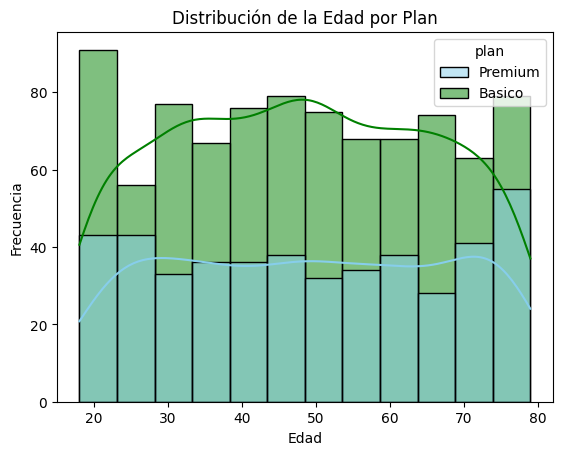

In [55]:
# Histograma para visualizar la edad (age)
sns.histplot(user_2024, x='age', hue='plan', kde=True, palette=['skyblue', 'green'])
plt.title('Distribución de la Edad por Plan')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

💡Insights: 
- Ambos planes tienen una amplia gama de edades, aunque con una ligera mayor concentración de usuarios jóvenes en el plan Premium.

Tipo de distribución: Simétrica no hay sesgo claro en la edad de los usuarios.

Text(0, 0.5, 'Frecuencia')

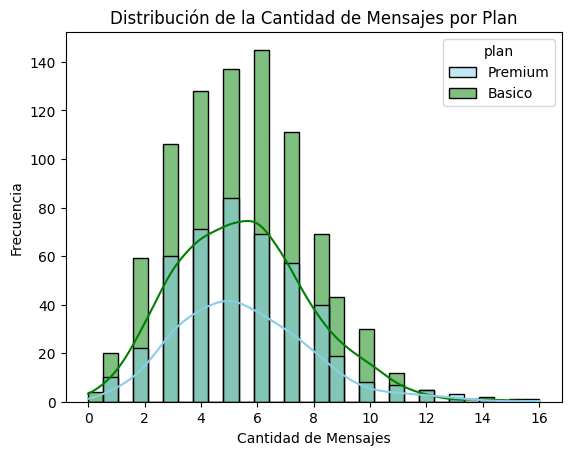

In [56]:
# Histograma para visualizar la cant_mensajes
sns.histplot(user_2024, x='cant_mensajes', hue='plan', kde=True, palette=['skyblue', 'green'])
plt.title('Distribución de la Cantidad de Mensajes por Plan')
plt.xlabel('Cantidad de Mensajes')
plt.ylabel('Frecuencia')

💡Insights: 
- No existe un patrón claro entre los planes en cuanto a la cantidad de mensajes enviados, ya que ambos planes parecen tener una distribución similar.

Tipo de distribución: Simétrica, ambos planes muestran una distribución parecida.

Text(0, 0.5, 'Frecuencia')

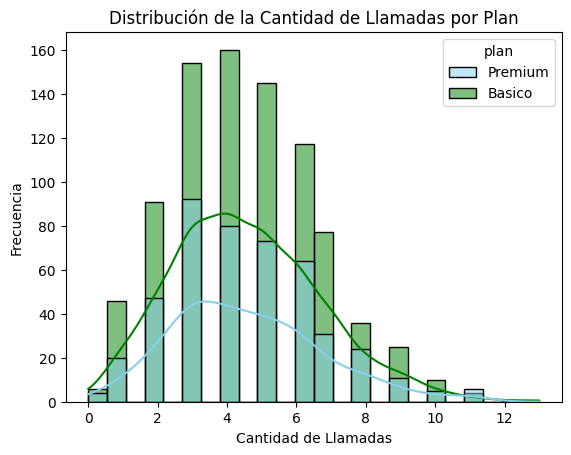

In [57]:
# Histograma para visualizar la cant_llamadas
sns.histplot(user_2024, x='cant_llamadas', hue='plan', kde=True, palette=['skyblue', 'green'])
plt.title('Distribución de la Cantidad de Llamadas por Plan')
plt.xlabel('Cantidad de Llamadas')
plt.ylabel('Frecuencia')

💡Insights: 
- No existe un patrón claro entre los planes en cuanto a la cantidad de llamadas realizadas.

Tipo de distribución: Simétrica, la cantidad de llamadas es similar para ambos planes.

Text(0, 0.5, 'Frecuencia')

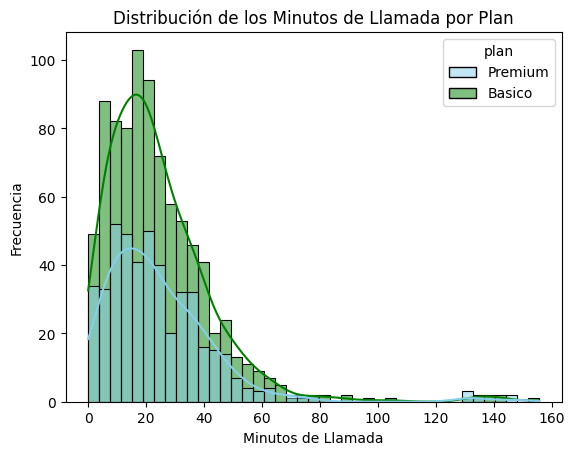

In [58]:
# Histograma para visualizar la cant_minutos_llamada

sns.histplot(user_2024, x='cant_minutos_llamada', hue='plan', kde=True, palette=['skyblue', 'green'])
plt.title('Distribución de los Minutos de Llamada por Plan')
plt.xlabel('Minutos de Llamada')
plt.ylabel('Frecuencia')

💡Insights: 
- Dentro del plan Premium, hay una mayor proporción de usuarios con más minutos de llamada, con un rango más amplio de usuarios que superan los 50 minutos. En cambio.

Tipo de distribución: Sesgada a la derecha, la mayoría tiene pocos minutos de llamada, pero algunos usuarios Premium tienen un alto consumo.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

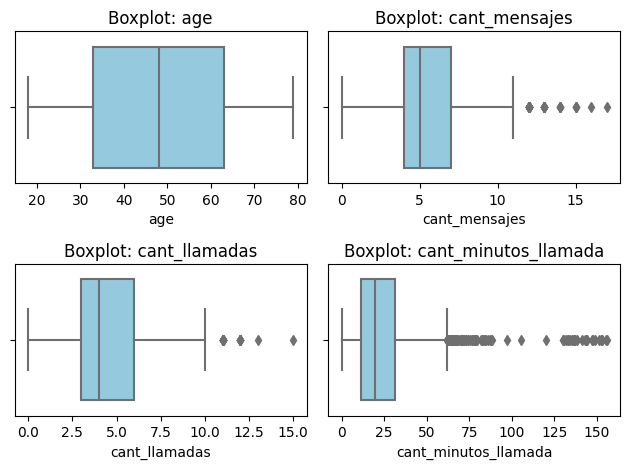

In [66]:
# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(2, 2, i) 
    sns.boxplot(x=user_profile[col], color='skyblue')
    plt.title(f'Boxplot: {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

💡Insights: 
- Age: No hay outliers
- cant_mensajes: Hay outliers
- cant_llamadas: Hay outliers
- cant_minutos_llamada: Hay outliers

In [63]:
# Calcular límites con el método IQR
columnas_limites = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

limites_superiores = {}

def calcular_limites_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)  
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR  
    limite_superior = Q3 + 1.5 * IQR  
    return limite_inferior, limite_superior

for col in columnas_limites:
    limite_inferior, limite_superior = calcular_limites_iqr(user_profile, col)
    limites_superiores[col] = limite_superior

    print(f"Límites IQR para {col}:")
    print(f"  Límite inferior: {limite_inferior}")
    print(f"  Límite superior: {limite_superior}")
    print(f"  Valor máximo de {col}: {user_profile[col].max()}")
    print("-" * 15)


Límites IQR para age:
  Límite inferior: -12.0
  Límite superior: 108.0
  Valor máximo de age: 79.0
---------------
Límites IQR para cant_mensajes:
  Límite inferior: -0.5
  Límite superior: 11.5
  Valor máximo de cant_mensajes: 17.0
---------------
Límites IQR para cant_llamadas:
  Límite inferior: -1.5
  Límite superior: 10.5
  Valor máximo de cant_llamadas: 15.0
---------------
Límites IQR para cant_minutos_llamada:
  Límite inferior: -19.322500000000005
  Límite superior: 61.8575
  Valor máximo de cant_minutos_llamada: 155.69
---------------


In [67]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.136000,5.524381,4.478120,23.317054
std,17.689919,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,48.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


💡Insights: 
- cant_mensajes: mantener o no outliers, porqué?
  Mantener el outlier, No es un valor irreal para un usuario activo.
- cant_llamadas: mantener o no outliers, porqué?
  Mantener el outlier, algunos usuarios pueden realizar más llamadas que otros.
- cant_minutos_llamada: mantener o no outliers, porqué?
  Mantener el outlier, las llamadas largas no son necesariamente errores, sino que reflejan un uso intensivo del servicio.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [70]:
# Crear columna grupo_uso
user_profile['grupo_uso'] = 'Bajo uso'  #'Bajo uso' por defecto

user_profile.loc[(user_profile['cant_llamadas'] >= 5) & (user_profile['cant_mensajes'] >= 5), 'grupo_uso'] = 'Alto uso'
user_profile.loc[(user_profile['cant_llamadas'] >= 5) & (user_profile['cant_mensajes'] < 5), 'grupo_uso'] = 'Uso medio'
user_profile.loc[(user_profile['cant_llamadas'] < 5) & (user_profile['cant_mensajes'] >= 5), 'grupo_uso'] = 'Uso medio'


In [72]:

# verificar cambios
user_profile.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Uso medio
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [74]:
# Crear columna grupo_edad
user_profile['grupo_edad'] = 'Joven'  #'Joven' por defecto
user_profile.loc[(user_profile['age'] >= 30) & (user_profile['age'] < 60), 'grupo_edad'] = 'Adulto'
user_profile.loc[(user_profile['age'] >= 60), 'grupo_edad'] = 'Adulto Mayor'

In [75]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Uso medio,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

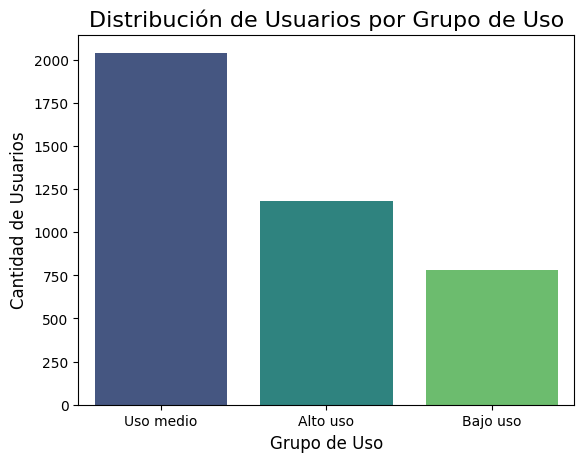

In [78]:
# Visualización de los segmentos por uso
sns.countplot(data=user_profile, x='grupo_uso', palette='viridis')

# Título y etiquetas
plt.title('Distribución de Usuarios por Grupo de Uso', fontsize=16)
plt.xlabel('Grupo de Uso', fontsize=12)
plt.ylabel('Cantidad de Usuarios', fontsize=12)

# Mostrar el gráfico
plt.show()

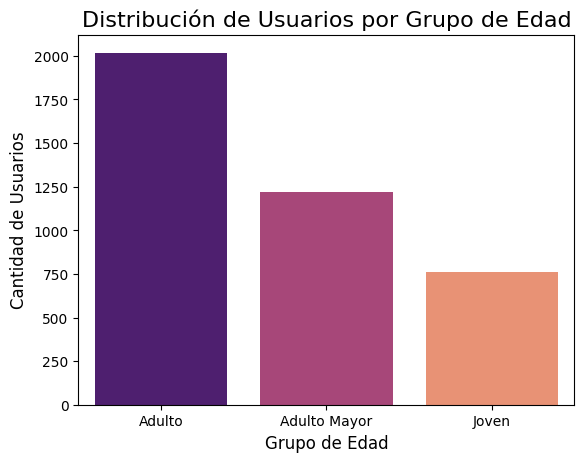

In [80]:
# Visualización de los segmentos por edad
sns.countplot(data=user_profile, x='grupo_edad', palette='magma')

# Título y etiquetas
plt.title('Distribución de Usuarios por Grupo de Edad', fontsize=16)
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Cantidad de Usuarios', fontsize=12)

# Mostrar el gráfico
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
**Valores nulos y sentinels**
En la columna <u>city</u>, se encontro un 11.7% de valores nulos, que representan 469 registros. Además, el valor '?' en esta columna fue considerado un sentinel y reemplazado por valores nulos.

En la columna churn_date, más del 88% de los valores eran nulos, lo que implica que la mayoría de los registros no tienen información sobre la fecha de cancelación, dificultando el análisis del churn.

En la columna age, se encontro un valor fuera de rango, -999, que fue reemplazado por la mediana (33 años).

En el dataset usage, se detectaron muchos valores nulos en duration y length, pero esto fue considerado MAR (Missing At Random) y por lo tanto, se dejó como nulo en los casos donde no había información disponible.


🔍 **Segmentos por Edad**
**Jóvenes (menores de 30 años)**: Este grupo representa una minoria en comparación con otros grupos, su comportamiento de consumo puede ser diferente

**Adultos (30–59 años)**: El segmento de Adultos es el grupo más grande, puede ser el segmento más comprometido con los planes actuales de ConnectaTel.

**Adultos mayores (60 años o más)**: El grupo de Adultos Mayores, aunque menos numerosos, podrían tener necesidades específicas, como planes más simples o con mayores minutos de llamadas. Este segmento está en crecimiento y debe ser considerado para ofrecer servicios más accesibles.


📊 **Segmentos por Nivel de Uso**
**Bajo uso**: Un grupo pequeño de usuarios se clasifica en Bajo uso, lo que sugiere que algunos usuarios no están aprovechando todo lo que ofrece su plan. Esto podría estar relacionado con planes que no se ajustan a sus necesidades.

**Uso medio**: Un porcentaje significativo de usuarios cae en este grupo, tienen espacio para gastar más en servicios adicionales como mensajes o minutos.

**Alto uso**: Estos clientes probablemente están utilizando todos los servicios y podrían beneficiarse de planes más completos o con mayor capacidad de minutos y mensajes.

➡️ **Esto sugiere que ...**
El grupo de alto uso es valioso para la empresa porque son usuarios que probablemente generen ingresos constantes.

El grupo de bajo uso podría estar insatisfecho con los planes actuales, y esto representa una oportunidad para crear planes más asequibles o simplificados. 

El grupo de adultos es crucial porque representan a los usuarios de mediana edad con mayor compromiso con los servicios.

Los adultos mayores requieren planes más accesibles.

💡 **Recomendaciones**
Optimización de planes para usuarios de bajo uso: Ofrecer planes más baratos y simplificados para los usuarios con bajo uso.

Fidelización de usuarios con uso medio: Crear planes flexibles para los usuarios con uso medio.

Planes premium para usuarios de alto uso: Para los usuarios con alto uso, ofrecer planes premium que incluyan más minutos.

Desarrollo de planes especializados para adultos mayores: Crear planes sencillos y accesibles para el grupo de adultos mayores.

Promociones para segmentos jóvenes: Ofrecer promociones especiales para jóvenes (menores de 30 años), como planes con mayores datos y beneficios para servicios de streaming y redes sociales, ya que es un grupo altamente conectado y digitalizado.

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`